# Structural models as algebraic equations 
The simplest representation of a PK model is an algebraic equation such as the one representing a one-compartment model, the drug being administered as a single intravenous bolus dose:

\begin{equation}
C(t) = \frac{Dose}{V} e^{-\frac{CL}{V}\cdot t}
\end{equation}

This model states the relationship between the independent variable, `time (t)`, and the dependent variable, concentration (`C`). The notation `C(t)` suggests that `C` depends on `t`. Dose, clearance (CL), and distribution volume (V) are param- eters (constants); they do not change with different values of t. 

Note the differences in the uses of the terms “variable” and “parameter.” The dependent and independent variables are chosen merely to extract information from the equation. In PK, time is often the independent variable. However, the equation could be rearranged such that CL is the independent variable and time is a constant (this may be done for sensitivity analysis for example).

The algebraic equation produces an exponential curve of concentration vs. time.

## Simulation of algebraic equation
Now we simulate the algebraic equation with parameters for clearance `CL` and volume of distribution `Vd` corresponding to warfarin.

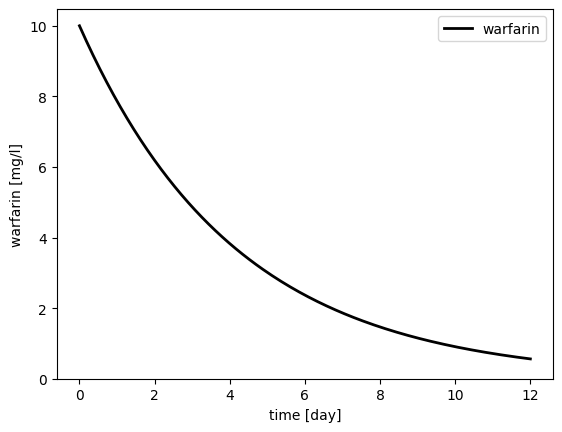

In [8]:
from matplotlib import pyplot as plt
import numpy as np

# Warfarin
V = 10  # [l]
CL = 0.1  # [L/hr]
Dose = 100  # [mg]
t = np.linspace(start=0, stop=12*24, num=200)  # [hr]
C = Dose/V * np.exp(-CL/V * t)  # [mg/l]
# 0.01 C0 = C0 * exp(-CL/V * tend)
# tend = -log(0.01) * V/CL

# plot
f, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t/24.0, C, label="warfarin", color="black", linewidth=2.0)
ax.set_xlabel("time [day]")
ax.set_ylabel("warfarin [mg/l]")
ax.set_ylim(bottom=0)
ax.legend()
plt.show()

## Adaptation to other drugs 
Now adapt the parameters `CL` and `V` and simulate the intravenous injection of other drugs.

![Clearance vs Vd](01_clearance_vs_vd.png)

**Exercise**: Solve the algebraic equation for the drugs aspirin or chloroquine by using the respective `CL` and `Vd` parameters from the figure.

## Parameter scans
To systematically study the effects of parameters on the algebraic model we can perform parameter scans. Hereby, single parameters are changed systematically to see the effect.

### Dose dependency

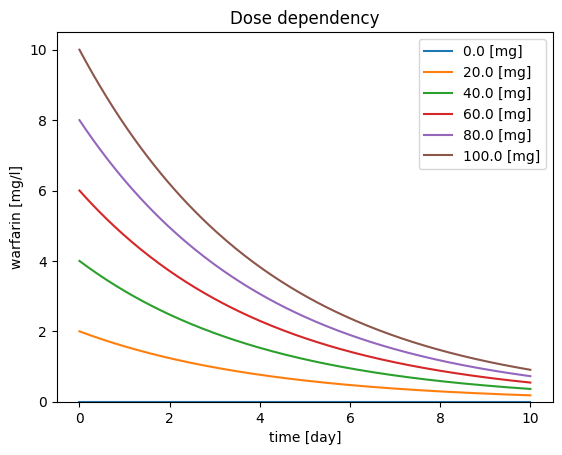

In [4]:
# Warfarin
V = 10  # [l]
CL = 0.1  # [L/hr]
Dose = 100  # [mg]
t = np.linspace(start=0, stop=10*24, num=200)  # [hr]

# Dose dependency
f, ax = plt.subplots(nrows=1, ncols=1)
for Dose in np.linspace(0, 100, num=6):
    C = Dose / V * np.exp(-CL / V * t)  # [mg/l]
    ax.plot(t/24.0, C, label=f"{Dose} [mg]")
# reset dose
Dose = 100  # [mg]

# plot
ax.set_xlabel("time [day]")
ax.set_ylabel("warfarin [mg/l]")
ax.set_ylim(bottom=0)
ax.legend()
ax.set_title("Dose dependency")
plt.show()

### Volume of distribution dependency

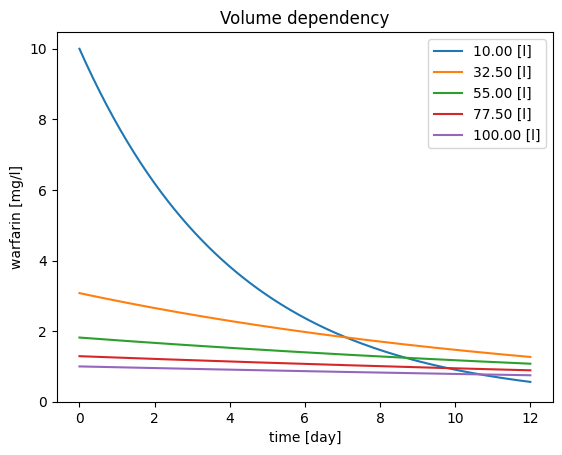

In [9]:
# V dependency
f, ax = plt.subplots(nrows=1, ncols=1)
for V in np.linspace(10, 100, num=5):
    C = Dose / V * np.exp(-CL / V * t)  # [mg/l]
    ax.plot(t/24.0, C, label=f"{V:.2f} [l]")
# reset volume
V = 10  # [mg]

ax.set_xlabel("time [day]")
ax.set_ylabel("warfarin [mg/l]")
ax.set_ylim(bottom=0)
ax.legend()
ax.set_title("Volume dependency")
plt.show()

**Exercise**: Implement a paramter scan for the clearance CL between `[0.1, 3]`